In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import uncertainties as u
from uncertainties import unumpy as unp



In [3]:
datos = pd.read_excel("datos.xlsx", sheet_name="Hoja3")
datos.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   long              10 non-null     float64
 1   cuentas por 100s  10 non-null     float64
 2   Radio             7 non-null      float64
 3   Conteos           7 non-null      float64
 4   ancho             7 non-null      float64
 5   conteo            7 non-null      float64
 6   Grosor mm         31 non-null     int64  
 7   N                 31 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.1 KB


In [4]:
long100=np.array(datos["long"])
long100=long100[~np.isnan(long100)]
Cuent100=np.array(datos["cuentas por 100s"])
Cuent100=Cuent100[~np.isnan(Cuent100)]

long300=np.array(datos["Radio"])
long300=long300[~np.isnan(long300)]
Cuent300=np.array(datos["Conteos "])
Cuent300=Cuent300[~np.isnan(Cuent300)]

ancho100=np.array(datos["ancho"])
ancho100=ancho100[~np.isnan(ancho100)]
CuentA100=np.array(datos["conteo"])
CuentA100=CuentA100[~np.isnan(CuentA100)]

ancho100j=np.array(datos["Grosor mm"])
ancho100j=ancho100j[~np.isnan(ancho100j)]
CuentA100j=np.array(datos["N"])
CuentA100j=CuentA100j[~np.isnan(CuentA100j)]

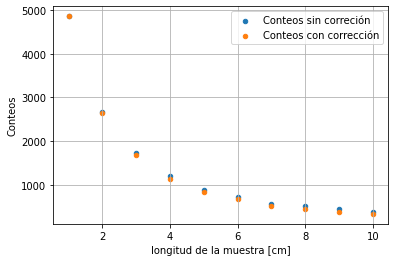

In [5]:
plt.scatter(long100,Cuent100,label="Conteos sin correción",s=20)
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)

plt.scatter(long100,(Cuent100-55)/(1-(Cuent100-55)*2.5*1e-6),label="Conteos con corrección",s=20)
plt.xlabel("longitud de la muestra [cm]")
plt.ylabel("Conteos")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 100 segundos')
plt.legend()
plt.grid()
plt.savefig('C_l100.jpg', bbox_inches='tight')


-1.1452167235660298
3.7392219265611373
-1.2129863386832276
3.751662688829278
0.03899260424020444


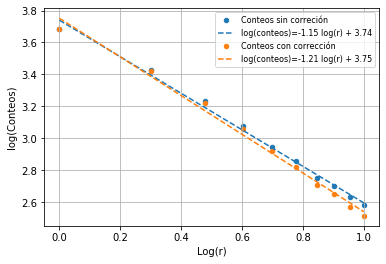

In [6]:
plt.scatter(np.log10(long100),np.log10(Cuent100),label="Conteos sin correción",s=20)
x=np.linspace(0.0,1,10)
slope, intercept, r_value, p_value, std_err = linregress(np.log10(long100),np.log10(Cuent100))
print(slope)
print(intercept)
y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,2)} log(r) + {np.round(intercept,2)}",linestyle="--" )
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)


log=(Cuent100-55)/(1-(Cuent100-55)*2.5*1e-6)
plt.scatter(np.log10(long100),np.log10(log),label="Conteos con corrección",s=20)
slope, intercept, r_value, p_value, std_err = linregress(np.log10(long100),np.log10(log))
print(slope)
print(intercept)
print(std_err)

y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,2)} log(r) + {np.round(intercept,2)}",linestyle="--" )

plt.xlabel("Log(r)")
plt.ylabel("log(Conteos)")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 100 segundos')
plt.legend(fontsize=8)
plt.grid()
plt.savefig('C_logl100.jpg', bbox_inches='tight')


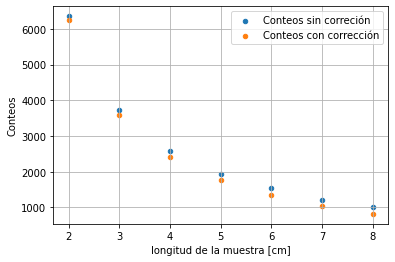

In [7]:
plt.scatter(long300,Cuent300,label="Conteos sin correción",s=20)
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)

plt.scatter(long300,(Cuent300-188)/(1-(Cuent300-188)*2.5*1e-6),label="Conteos con corrección",s=20)
plt.xlabel("longitud de la muestra [cm]")
plt.ylabel("Conteos")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 300 segundos')
plt.legend()
plt.grid()
plt.savefig('C_l300.jpg', bbox_inches='tight')

-1.3189333158015892
4.203414622365858
delta 0.013695761802742934
-1.4511236259137967
4.245634505880708
0.028818062381148164


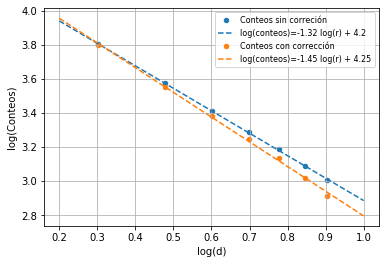

In [8]:
plt.scatter(np.log10(long300),np.log10(Cuent300),label="Conteos sin correción",s=20)
x=np.linspace(0.2,1,10)
slope, intercept, r_value, p_value, std_err = linregress(np.log10(long300),np.log10(Cuent300))
print(slope)
print(intercept)
print("delta",std_err)
y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,2)} log(r) + {np.round(intercept,2)}",linestyle="--" )
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)


log=(Cuent300-188)/(1-(Cuent300-188)*2.5*1e-6)
plt.scatter(np.log10(long300),np.log10(log),label="Conteos con corrección",s=20)
slope, intercept, r_value, p_value, std_err = linregress(np.log10(long300),np.log10(log))
print(slope)
print(intercept)
print(std_err)
y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,2)} log(r) + {np.round(intercept,2)}",linestyle="--" )


plt.xlabel("log(d)")
plt.ylabel("log(Conteos)")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 300 segundos')
plt.legend(fontsize=8)
plt.grid()
plt.savefig('C_logl300.jpg', bbox_inches='tight')


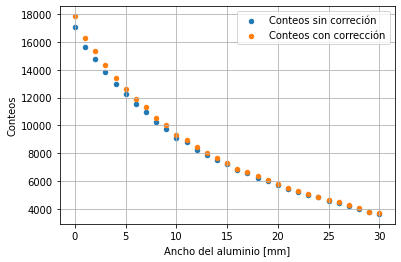

In [9]:
plt.scatter(ancho100j,CuentA100j,label="Conteos sin correción",s=20)
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)

plt.scatter(ancho100j,(CuentA100j)/(1-(CuentA100j)*2.5*1e-6),label="Conteos con corrección",s=20)
plt.xlabel("Ancho del aluminio [mm]")
plt.ylabel("Conteos")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 600 segundos')
plt.legend()
plt.grid()
plt.savefig('C_A500.jpg', bbox_inches='tight')

-0.04977314343170015
9.658970746979048
delta -0.9973763165376586
-0.050806328415512816
9.695247184555408
delta 6.411985765226311e-34


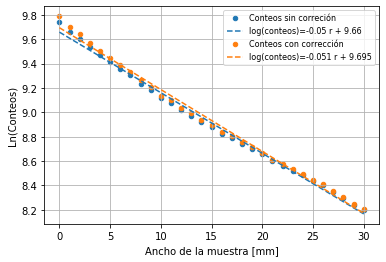

In [14]:


plt.scatter(ancho100j,np.log(CuentA100j),label="Conteos sin correción",s=20)
x=np.linspace(0,30,10)
slope, intercept, r_value, p_value, std_err = linregress(ancho100j,np.log(CuentA100j))
print(slope)
print(intercept)
print("delta",r_value)
y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,2)} r + {np.round(intercept,2)}",linestyle="--" )
# plt.scatter(long100,(Cuent100-55),label="Conteos menos la radiación de fondo",s=10)


log=(CuentA100j)/(1-(CuentA100j)*2.5*1e-6)
plt.scatter(ancho100j,np.log(log),label="Conteos con corrección",s=20)
slope, intercept, r_value, p_value, std_err= linregress(ancho100j,np.log(log))
print(slope)
print(intercept)
print("delta",p_value)
y = slope*x + intercept
plt.plot(x,y,label=f"log(conteos)={np.round(slope,3)} r + {np.round(intercept,3)}",linestyle="--" )
plt.xlabel("Ancho de la muestra [mm]")
plt.ylabel("Ln(Conteos)")
#plt.title(f'Conteo de interacciones de la radiación \n gamma por 500')
plt.legend(fontsize=8)
plt.grid()
plt.savefig('C_lnA500.jpg', bbox_inches='tight')

In [11]:
Coef_lineal= u.ufloat(0.0508, 0.0007)
print(Coef_lineal,"mm^-1")
cross_section=Coef_lineal*10/(2.23e22)
print(cross_section,"cm^-2")
print(cross_section*1e24,"barns")
print(15/(0.662),"aprox libro")


0.0508+/-0.0007 mm^-1
(2.278+/-0.031)e-23 cm^-2
22.78+/-0.31 barns
22.65861027190332 aprox libro
